In [1]:
import logging, sys, math
import logging, sys, math,os

currentFolder = os.path.abspath('')
try:
    sys.path.remove(str(currentFolder))
except ValueError: # Already removed
    pass

projectFolder = '/home/exx/muktadir/earthquakePrediction/'
projectFolder = 'F:/myProjects/tfKeras/UCSC/CMPS242/earthquake/'
sys.path.append(str(projectFolder))

In [2]:
exec(open("initKeras.py").read())

Using TensorFlow backend.


In [4]:
if sys.modules.get( 'library.SingleBinDataGenerator', False ) != False :
    del sys.modules['library.SingleBinDataGenerator'] 
if sys.modules.get( 'SingleBinDataGenerator', False ) != False :
    del sys.modules['SingleBinDataGenerator'] 
from library.SingleBinDataGenerator import *

logging.warning( "SingleBinDataGenerator loaded" )

trainGenerator = SingleBinDataGenerator(numBins = 20000, shuffle=False)
validationGenerator = SingleBinDataGenerator(startBinId = 20001, numBins = 2000, shuffle=False)


In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

if sys.modules.get( 'library.LivePlotKeras', False ) != False :
    del sys.modules['library.LivePlotKeras'] 
if sys.modules.get( 'LivePlotKeras', False ) != False :
    del sys.modules['LivePlotKeras'] 
from library.LivePlotKeras import *

logging.warning( "LivePlotKeras loaded" )

livePlotKeras = LivePlotKeras()

In [12]:

batch_size = 32
train_steps = int(20000 / batch_size)
validation_steps = int(2000 / batch_size)

In [13]:
model_input = layers.Input( shape = ( 64, 64, 1 ) )
x = layers.Conv2D(64, 
        kernel_size = (5,5), 
        activation = activations.relu,
        padding = 'same'
        )(model_input)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(32, kernel_size=(3,3), activation=activations.relu, padding='same')(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(16, kernel_size=(3,3), activation=activations.relu, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(1)(x)

model = models.Model(model_input, x, name = "TinyCNN")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        1664      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        4624      
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)             0         
__________

In [14]:
model.compile(optimizer=optimizers.Adam(lr=0.001),
             loss = losses.MSE,
             metrics = [metrics.MSE, metrics.MAE])

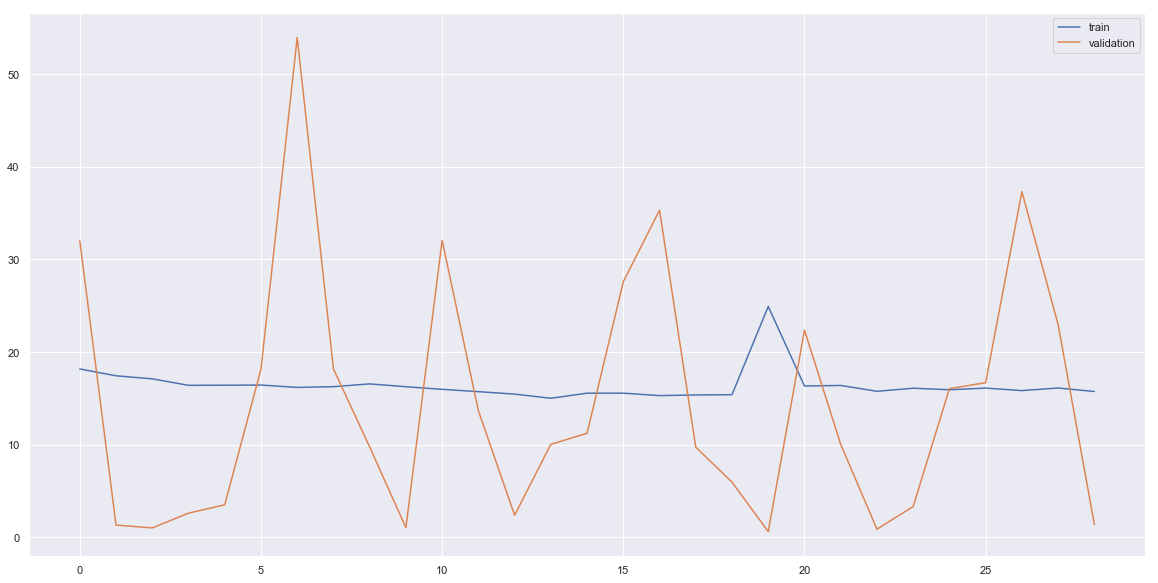

In [15]:
history = model.fit_generator( generator=trainGenerator,
                    validation_data = trainGenerator,
                    use_multiprocessing=True, 
                    workers=2, 
                    initial_epoch = 1,
                    epochs=30,
                    max_q_size = 100,
                    steps_per_epoch = train_steps,
                    validation_steps = validation_steps,
                    callbacks = [livePlotKeras]
                   )

In [ ]:
trainError = history.history['mean_squared_error']
validationError = history.history['val_mean_squared_error']
n = list(range(len(trainError)))
ax = sns.lineplot(n, y=trainError, estimator = None, label = "train" )
ax = sns.lineplot(n, y=validationError, estimator = None, label = "validation" )